<a href="https://colab.research.google.com/github/josepeon/python_dad_class/blob/main/pytorch_intro_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolutional Nets in `PyTorch`

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10, ImageFolder
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

#### Convolutions

<center>
   <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/790px-Typical_cnn.png />
</center>

In [121]:
np.random.seed(22)
im = np.random.randint(low = 1, high = 10, size = 25).reshape(5, 5)
im

array([[6, 5, 1, 5, 7],
       [7, 5, 9, 5, 3],
       [9, 8, 3, 9, 9],
       [6, 5, 3, 3, 2],
       [7, 4, 4, 3, 8]])

In [122]:
#three by three filter
f = np.zeros((3, 3))
f

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [123]:
f[:, 0] = 1
f[:, -1] = -1
f

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

<Axes: >

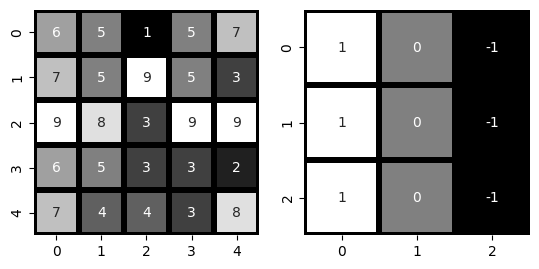

In [124]:
#side by side images
import seaborn as sns
fig, ax = plt.subplots(1, 2)

sns.heatmap(im, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black', ax = ax[0])


sns.heatmap(f, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black', ax = ax[1])


In [125]:
#select upper left corner of image
im[:3, :3]

array([[6, 5, 1],
       [7, 5, 9],
       [9, 8, 3]])

In [126]:
#convolve
np.sum(im[:3, :3]*f)

np.float64(9.0)

In [127]:
#What is this doing?
output = np.zeros((3, 3))
for row in range(3):
    for col in range(3):
        output[row, col] = np.sum(f*im[row: row + 3, col: col + 3])

In [128]:
#examine output
output

array([[ 9., -1., -6.],
       [ 7.,  1.,  1.],
       [12.,  2., -9.]])

In [129]:
#10 by 10 grid
im2 = np.zeros((10, 10))
im2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [130]:
#make first half 10
im2[:, :5] = 10

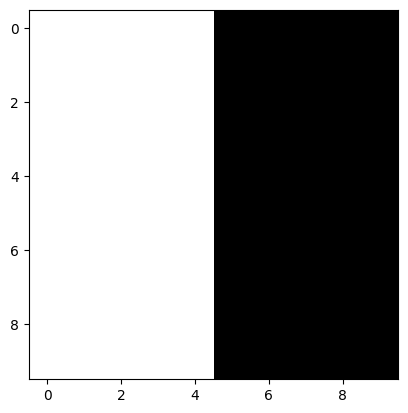

In [131]:
#take a look
plt.imshow(im2, cmap = 'gray')

In [132]:
#convolutions
output = np.zeros((8, 8))
for row in range(8):
    for col in range(8):
        output[row, col] = np.sum(f * im2[row: row + 3, col: col + 3])

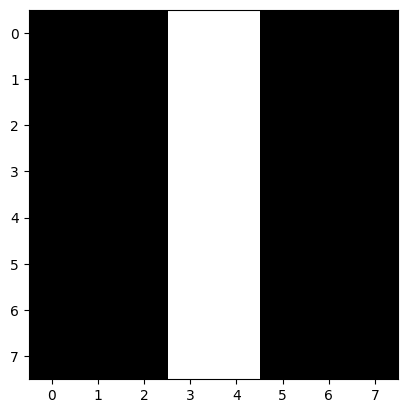

In [133]:
#take a look at result
plt.imshow(output, cmap = 'gray')

In [134]:
f

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

In [135]:
f.T

array([[ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1., -1., -1.]])

### Max Pooling

<center>
<img src = https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png />
</center>

#### Fashion Images

In [136]:
from torchvision.datasets import FashionMNIST

In [137]:
train = FashionMNIST(root = '.', download = True)

In [138]:
train[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

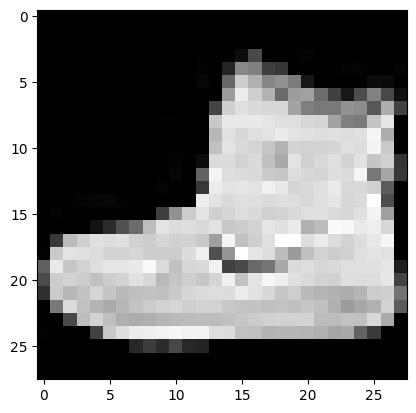

In [139]:
plt.imshow(train[0][0], cmap = 'gray')

In [140]:
from torchvision.transforms import ToTensor

In [141]:
train = FashionMNIST(root = '.', download = True, transform = ToTensor())

In [142]:
train[0][0].shape

torch.Size([1, 28, 28])

In [143]:
train[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

#### Basic Convolution Example

In [144]:
conv = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3)

In [145]:
output = conv(train[0][0])

In [146]:
output.shape

torch.Size([1, 26, 26])

In [147]:
conv = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3, padding = 1)

In [148]:
output = conv(train[0][0])

In [149]:
output.shape

torch.Size([1, 28, 28])

In [150]:
pool = nn.MaxPool2d(kernel_size = 2)

In [151]:
pool(output).shape

torch.Size([1, 14, 14])

In [152]:
model = nn.Sequential(nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3, padding = 1),
                      nn.MaxPool2d(kernel_size = 2), #28x28 --> 14x14
                      nn.Flatten(),
                      nn.Linear(in_features = 14*14, out_features = 10))

In [153]:
conv.weight

Parameter containing:
tensor([[[[ 0.3127,  0.1918, -0.0643],
          [-0.0513,  0.0533, -0.0112],
          [ 0.3127,  0.2205,  0.3253]]]], requires_grad=True)

In [154]:
model(train[0][0])

tensor([[-0.1093, -0.2970,  0.0377,  0.0238, -0.0348,  0.0765, -0.0119,  0.0945,
          0.1871, -0.3849]], grad_fn=<AddmmBackward0>)

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
trainset = CIFAR10(root = '.', download = True)

In [157]:
type(trainset[0][0])

PIL.Image.Image

In [158]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Resize((32, 32))
    transforms.Normalize(mean = (0.5, 0.5, 0.5),
                         std = (0.5, 0.5, 0.5))
])

In [159]:
trainset = CIFAR10(root = '.', download = True, transform=transform)

In [160]:
trainloader = DataLoader(trainset, batch_size = 24)

In [161]:
testset = CIFAR10('.', train = False, transform=transform)

In [162]:
test_loader = DataLoader(testset, batch_size = 24, shuffle = False)

In [163]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

In [164]:
# get a random training image
im, label = trainloader.dataset[0]

In [165]:
#examine shape
im.shape

torch.Size([3, 32, 32])

In [166]:
#size of one image
im[0].shape

torch.Size([32, 32])

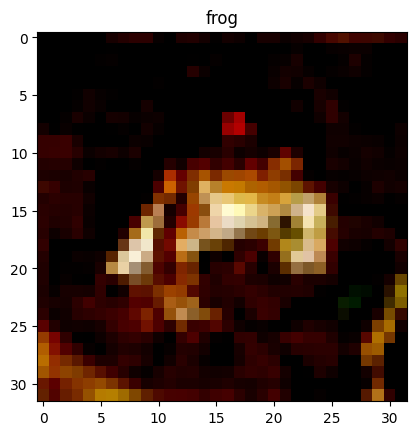

In [167]:
#visualize image
plt.imshow(np.transpose(im, (1, 2, 0)))
plt.title(classes[int(label)]);

In [168]:
im.flatten().shape

torch.Size([3072])

In [169]:
simple_network = nn.Sequential(nn.Flatten(),
                               nn.Linear(3072, 100),
                               nn.ReLU(),
                               nn.Linear(100, 10))

In [170]:
torch.argmax(simple_network(im.unsqueeze(0)))

tensor(1)

In [171]:
classes[8]

'ship'

### Define Convolutional Neural Network

In [172]:
nn.Conv2d?

$$\text{INPUT} = (C_{in}, H_{in}, W_{in})$$

$$\text{OUTPUT} = (C_{out}, H_{out}, W_{out})$$

$$H_{out} = \left\lfloor\frac{H_{in}  + 2 \times \text{padding}[0] - \text{dilation}[0]
                    \times (\text{kernel\_size}[0] - 1) - 1}{\text{stride}[0]} + 1\right\rfloor$$

$$W_{out} = \left\lfloor\frac{W_{in}  + 2 \times \text{padding}[1] - \text{dilation}[1]
                    \times (\text{kernel\_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor$$

In [173]:
#example conv2d
layer_1 = nn.Conv2d(in_channels = 3,
                    out_channels = 16,
                    kernel_size = 3,
                    stride = 1,
                    padding = 1)

In [174]:
#data through
x = layer_1(im)

In [175]:
#shape?
x.shape

torch.Size([16, 32, 32])

In [176]:
#pool and examine
pool_1 = nn.MaxPool2d(2)
x = pool_1(x)
x.shape

torch.Size([16, 16, 16])

In [177]:
#convolve again
conv_2 = nn.Conv2d(in_channels = 16,
                   out_channels = 8,
                   kernel_size = 3,
                   stride = 1,
                   padding = 1)
x = conv_2(x)
x.shape

torch.Size([8, 16, 16])

In [178]:
# pool again
x = pool_1(x)
x.shape

torch.Size([8, 8, 8])

In [179]:
#flatten
f = nn.Flatten()
x = f(x)
x.shape

torch.Size([8, 64])

In [180]:
##pass through linear layer
linear_1 = nn.Linear(64, 100)
x = linear_1(x)
x.shape

torch.Size([8, 100])

In [181]:
import torch.nn as nn
import torch.nn.functional as F

In [182]:
#relu as a class
relu = nn.ReLU()

In [183]:
x = torch.randn(size = (10, 10))

In [184]:
relu(x)

tensor([[0.0000, 0.0636, 1.5575, 0.0000, 0.0000, 0.0000, 0.0000, 0.0419, 0.2704,
         0.7116],
        [0.7354, 0.5421, 0.0000, 0.0000, 0.3634, 0.0000, 0.0000, 1.8001, 0.0000,
         0.2671],
        [0.0000, 0.8398, 0.4025, 1.5038, 0.0000, 0.0449, 0.0000, 0.0224, 0.0000,
         0.0000],
        [0.4209, 0.0505, 0.6629, 0.2075, 0.2149, 0.0000, 0.0000, 0.0765, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.6993, 1.8925, 1.3079, 0.4571, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.8270, 0.0446, 0.0000, 0.0000, 0.0000, 0.7500,
         0.7374],
        [0.9639, 1.2554, 0.0000, 0.0000, 0.9414, 0.0000, 0.0793, 1.9910, 0.4190,
         0.0000],
        [0.4677, 0.0000, 0.0000, 0.6944, 0.0000, 0.0000, 0.0000, 0.0000, 0.4688,
         1.1630],
        [0.0000, 0.1056, 1.1412, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3508,
         0.0000],
        [0.0000, 0.0000, 0.4822, 0.0000, 0.9066, 0.0000, 0.0000, 0.3708, 1.1650,
         0.4683]])

In [185]:
F.relu(x)

tensor([[0.0000, 0.0636, 1.5575, 0.0000, 0.0000, 0.0000, 0.0000, 0.0419, 0.2704,
         0.7116],
        [0.7354, 0.5421, 0.0000, 0.0000, 0.3634, 0.0000, 0.0000, 1.8001, 0.0000,
         0.2671],
        [0.0000, 0.8398, 0.4025, 1.5038, 0.0000, 0.0449, 0.0000, 0.0224, 0.0000,
         0.0000],
        [0.4209, 0.0505, 0.6629, 0.2075, 0.2149, 0.0000, 0.0000, 0.0765, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.6993, 1.8925, 1.3079, 0.4571, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.8270, 0.0446, 0.0000, 0.0000, 0.0000, 0.7500,
         0.7374],
        [0.9639, 1.2554, 0.0000, 0.0000, 0.9414, 0.0000, 0.0793, 1.9910, 0.4190,
         0.0000],
        [0.4677, 0.0000, 0.0000, 0.6944, 0.0000, 0.0000, 0.0000, 0.0000, 0.4688,
         1.1630],
        [0.0000, 0.1056, 1.1412, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3508,
         0.0000],
        [0.0000, 0.0000, 0.4822, 0.0000, 0.9066, 0.0000, 0.0000, 0.3708, 1.1650,
         0.4683]])

In [186]:
class CNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
    self.pool = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(16, 8, 3, padding = 1)
    self.flatten = nn.Flatten()
    self.linear_1 = nn.Linear(8*8*8, 100)
    self.linear_2 = nn.Linear(100, 50)
    self.linear_3 = nn.Linear(50, 10)
    self.activation = nn.ReLU()

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.flatten(x)
    shape_of_flattened = x.shape
    x = F.relu(self.linear_1(x))
    x = F.relu(self.linear_2(x))
    x = self.linear_3(x)
    return x



In [187]:
import torch.optim as optim

In [188]:
# instantiate
model = CNet()

In [189]:
#criteria and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [190]:
#train briefly
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
device

'cuda'

In [191]:
from tqdm import tqdm

In [192]:
for epoch in tqdm(range(5)):
  loss = 0
  for i, data in enumerate(trainloader):
    #training loop
    inputs, labels = data
    #move batch to gpu
    inputs = inputs.to(device)
    labels = labels.to(device)
    #pass data through model
    output = model(inputs)
    #evaluate predictions
    loss = criterion(output, labels)
    #backprop
    optimizer.zero_grad()
    loss.backward()
    #step to less loss
    optimizer.step()
    loss += loss.item()
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

 20%|██        | 1/5 [00:20<01:21, 20.31s/it]

Epoch: 1, Loss: 4.407154083251953


 40%|████      | 2/5 [00:40<01:01, 20.42s/it]

Epoch: 2, Loss: 4.974793910980225


 60%|██████    | 3/5 [00:58<00:38, 19.32s/it]

Epoch: 3, Loss: 4.238228797912598


 80%|████████  | 4/5 [01:17<00:19, 19.22s/it]

Epoch: 4, Loss: 4.116954803466797


100%|██████████| 5/5 [01:35<00:00, 19.07s/it]

Epoch: 5, Loss: 3.8757364749908447


In [193]:
correct = 0
total = 0
#accuracy of test data
with torch.no_grad():
  for data in test_loader:
    #evaluate
    images, label = data
    images = images.to(device)
    labels = label.to(device)
    yhat = model(images)
    _, predicted = torch.max(yhat.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

In [194]:
#percent correct?
correct/total

0.4056

### Extra: Using Pretrained Models

In [195]:
import torchvision
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision.io import read_image

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
ls /content/drive/MyDrive/GettyImages-sb10066858aa-001-e1693353192358.jpeg

/content/drive/MyDrive/GettyImages-sb10066858aa-001-e1693353192358.jpeg


In [198]:
img = read_image('/content/drive/MyDrive/GettyImages-sb10066858aa-001-e1693353192358.jpeg')

In [199]:
img

tensor([[[238, 238, 239,  ..., 240, 240, 240],
         [238, 238, 239,  ..., 240, 240, 240],
         [238, 238, 239,  ..., 240, 240, 240],
         ...,
         [230, 230, 230,  ..., 242, 242, 242],
         [230, 230, 230,  ..., 242, 242, 242],
         [231, 231, 231,  ..., 242, 242, 242]],

        [[240, 240, 239,  ..., 238, 238, 238],
         [240, 240, 239,  ..., 238, 238, 238],
         [240, 240, 239,  ..., 238, 238, 238],
         ...,
         [232, 232, 232,  ..., 241, 241, 241],
         [232, 232, 232,  ..., 241, 241, 241],
         [231, 231, 231,  ..., 241, 241, 241]],

        [[239, 239, 239,  ..., 239, 239, 239],
         [239, 239, 239,  ..., 239, 239, 239],
         [239, 239, 239,  ..., 239, 239, 239],
         ...,
         [229, 229, 229,  ..., 239, 239, 239],
         [229, 229, 229,  ..., 239, 239, 239],
         [229, 229, 229,  ..., 239, 239, 239]]], dtype=torch.uint8)

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
model = models.resnet50()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [202]:
# Step 1: Initialize model with the best available weights
weights = models.ResNet50_Weights.DEFAULT
model = models.resnet50(weights = weights)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [203]:
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

In [204]:
# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

In [205]:
batch.shape

torch.Size([1, 3, 224, 224])

In [206]:
# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
prediction.argmax().item()

254

In [207]:
prediction[592].item()

0.0002465867146383971

In [208]:
weights.meta['categories'][592]

'hard disc'

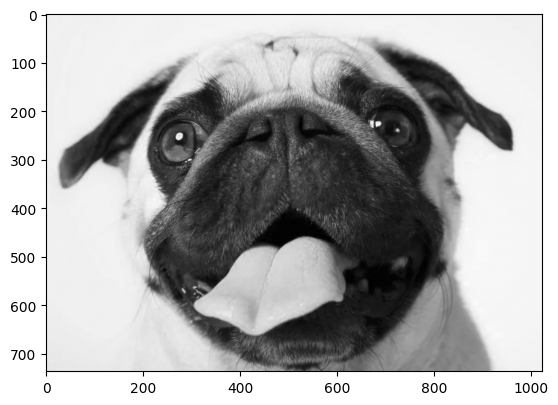

In [209]:
plt.imshow(img[0, :, :], cmap = 'gray')

In [214]:
weights = models.GoogLeNet_Weights.DEFAULT
model = models.googlenet(weights = weights)
model

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


100%|██████████| 49.7M/49.7M [00:00<00:00, 220MB/s]


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [215]:
transform = weights.transforms()

In [216]:
X = transform(img)

In [220]:
model(X.unsqueeze(0)).argmax()

tensor(704)

In [221]:
weights.meta['categories'][704]

'parking meter'